In [1]:
library(twitteR)
library(rtweet)
library(ROAuth)
library(RCurl)
library(tidytext)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(reshape2)
library(wordcloud)
library(tm)
library(qdap)
library(radarchart)

Warning message:
"package 'twitteR' was built under R version 3.6.3"Warning message:
"package 'rtweet' was built under R version 3.6.3"
Attaching package: 'rtweet'

The following object is masked from 'package:twitteR':

    lookup_statuses

Warning message:
"package 'ROAuth' was built under R version 3.6.3"Warning message:
"package 'RCurl' was built under R version 3.6.3"Warning message:
"package 'tidytext' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 

In [3]:
food<- read.csv("Arabic food-4k-tweets.csv", header=TRUE)


In [4]:
food

X,Datetime,Text
0,2020-07-25 00:16:51+00:00,i had arabic food for the first time today and it was so fucking good
1,2020-07-24 22:24:01+00:00,girl why are you ordering food at midnight?...
2,2020-07-24 21:51:01+00:00,Honest question. Why is Arabic writing always off to the side like this?
3,2020-07-24 21:49:36+00:00,ask her to write the recipes!! i had my grandma do that bc that was the last bit of arabic food we had . and my dad uses her recipes to this day!! and thatâ€™s so good!!!!!!!!!!!!!!!!! spanish is beautifulll
4,2020-07-24 21:20:54+00:00,"That's the reason I never wanna leave KSA, It has my heart . A million memories, Hell lot of friends, Late night drives, Those weird moments when you don't know what the other person is saying in Arabic, The Arab food , The beautiful places here, the soothing corniche"
5,2020-07-24 21:14:37+00:00,Arabic. Turks got their food from the Arabs..
6,2020-07-24 20:40:02+00:00,BRO U HAVE TO TRY ARABIC FOOD
7,2020-07-24 20:30:59+00:00,no i wont pack lunch everyday no way im making arabic food anytime before 1pm
8,2020-07-24 20:00:55+00:00,"Get in line for a free ebook copy of ""Do Not Awaken Love"" by Melissa Addey http://fab.cy/wt #melissaaddey #middleeastern #middleeast #arabic #arab #food #love #dubai #instagood #moviefied #ebook"
9,2020-07-24 19:21:29+00:00,Reminiscent of the famous EdgwareRoad or streets of Lebanon in the heart of Warwick #shisha #sheesha #lebanese #lebanesefood #lebanon #arabicfood #arabian #smoke #restaurant #warwick #alfakher #buyin2warwick


In [5]:
food$Text = gsub("&amp", "", food$Text)
food$Text = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", "", food$Text)
food$Text = gsub("@\\w+", "", food$Text)
food$Text = gsub("[[:punct:]]", "", food$Text)
food$Text = gsub("[[:digit:]]", "", food$Text)
food$Text = gsub("http\\w+", "", food$Text)
food$Text = gsub("[ \t]{2,}", "", food$Text)
food$Text = gsub("^\\s+|\\s+$", "", food$Text)
food$Text <- iconv(food$Text, "UTF-8", "ASCII", sub="")
food$Text <- tolower(food$Text)

In [6]:
food <- food %>%
    unnest_tokens(word,input=Text)

In [7]:
food %>%
    anti_join(stop_words) %>%
    count(word, sort = TRUE)

Joining, by = "word"


word,n
food,3644
arabic,3526
coffee,463
drink,419
song,365
color,308
favestags,303
scent,290
love,261
arabicfood,247


In [8]:
my_stop_words <- tibble(word = c( "shit","fuck","know","get","will","can","try","food","foodies","eat","home","today","recipe","work","going","dont","make","one","tomorrow","time","new","lunch","foodie","ufb","sleep","made", "knowing","breakfast","Arab","looks","foodporn","now","bts","help","And","clip","Muslim","ufacbts","idk","need","itstimeforbtsidyumpia","Ldfyumplay", "ufae","today","dinner","language","want","episode","Itstimeforbtsldfyumpla","ldfyumplay","think","didn't","loss","really","eating","lol","stop","come","recipes","This","something","aid","miss","You","break","fucking","false","hamper","slowly","win","food","twist","shake","pan","free","rich","top","classic","wrong","lazy","dick","damn","stall", "stalls","fans", "Why","fucking","Food","food","my","It","many","My","songs","make","time","arabicfood","word",
      "Its","word","we","English","Arabic","I","arabic","5","Drink","coffee","tags","The","turn","your","Song","song","Im","Your","We","one","know","amp","people"),lexicon ="twitter" )

In [9]:
new_stop_list <- stop_words %>% 
bind_rows(my_stop_words)

In [10]:
clean <- food %>%
anti_join(new_stop_list)

Joining, by = "word"


In [11]:
food_sentiment1 <- clean %>%   
inner_join(get_sentiments("bing")) %>%   
count(word, sentiment)

Joining, by = "word"


In [12]:
topwords <- food_sentiment1 %>%   
group_by(sentiment) %>%   
top_n(15) %>%   
ungroup() %>%   
mutate(word = reorder(word, n))

Selecting by n


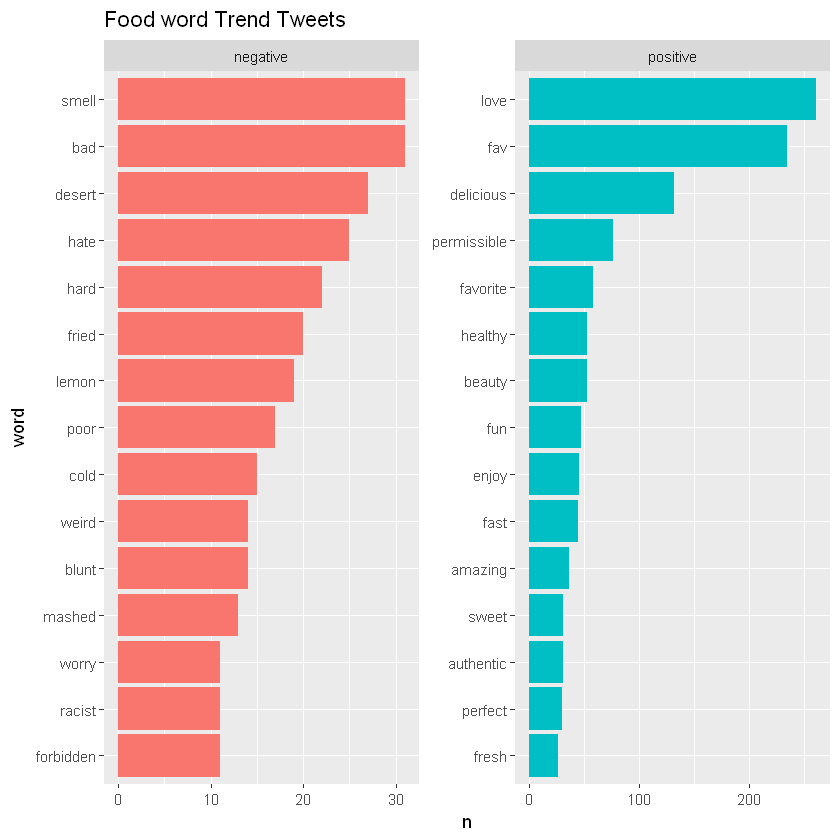

In [13]:
ggplot(topwords, aes(word, n, fill= sentiment))+      
geom_col(show.legend = FALSE) +       
facet_wrap(~sentiment, scales = "free") + 
labs(title= "Food word Trend Tweets") + coord_flip()

In [14]:
library(ggplot2)


Joining, by = "word"


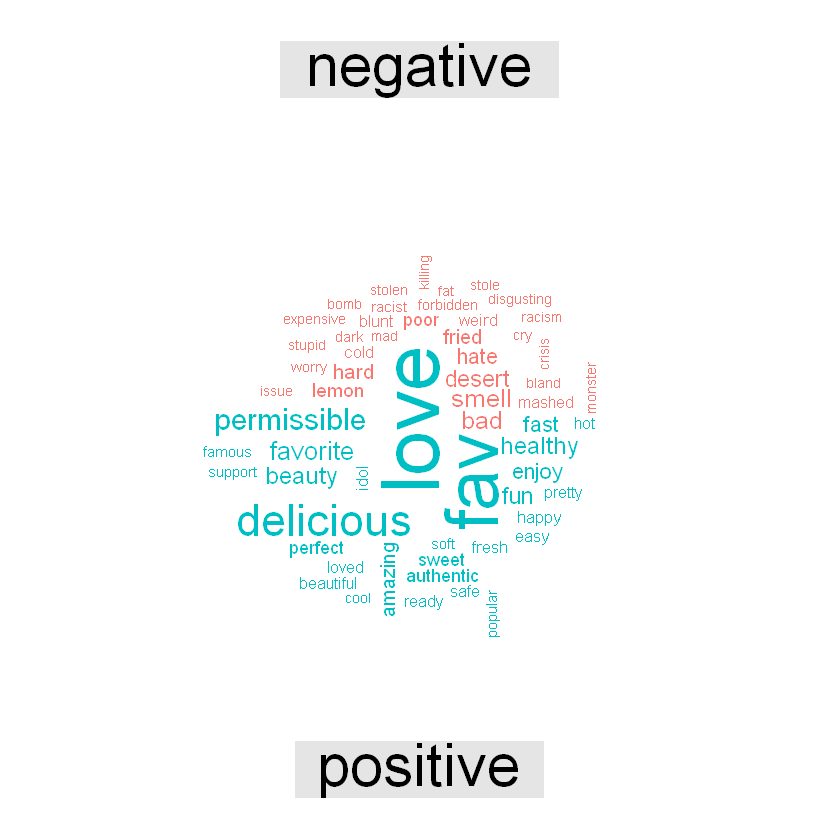

In [17]:
clean %>%   
inner_join(get_sentiments("bing")) %>%  
count(word, sentiment, sort=TRUE) %>%   
acast(word ~sentiment, value.var= "n", fill= 0) %>%   
comparison.cloud(colors = c("#F8766D", "#00BFC4"), max.words = 60)